In [1]:
#imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Adam\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#load our titanic data
titanic_df = pd.read_csv('train.csv')

In [3]:
#check out what it looks like
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Survived 1 means they lived, 0 means they did not.
Pclass is the person class, 1st, 2nd or 3rd class
SibSp is number of siblings.
Parch means they had child or parent on board.
Fare is cost of ticket.
Cabin is their room, many are missing, letter is the deck level.
Embarked is the city.

In [4]:
#whats our info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
#some of the ages are missing
titanic_df[titanic_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [6]:
#fill in the missing age values by interpolating
titanic_df['Age'] = titanic_df['Age'].interpolate()
#doing this only changes the mean age by ~0.13 years

In [7]:
#Now everybody has an age
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


C:\Users\Adam\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


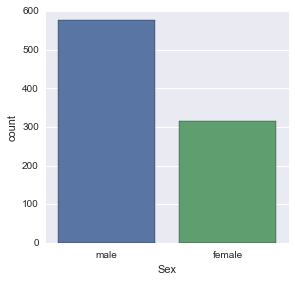

In [8]:
#gender makeup of our passengers, mostly male
sns.factorplot('Sex',data=titanic_df, kind='count')

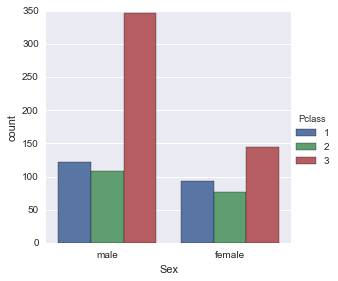

In [9]:
#comparing gender to class we see a large number of 3rd class men
sns.factorplot('Sex',data=titanic_df, hue='Pclass', kind='count', hue_order=[1,2,3])

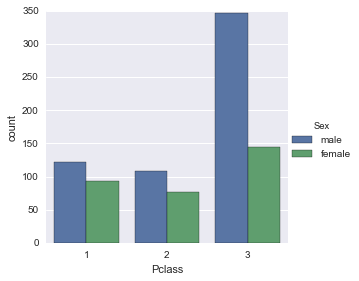

In [10]:
#flipping attributes around
sns.factorplot('Pclass',data=titanic_df, hue='Sex', kind='count', order=[1,2,3])

In [11]:
#seperate children out
def male_female_child(passenger):
    age,sex = passenger
    #lets say children are under 16
    if age < 16:
        return 'child'
    else:
        return sex
#might make more sence to return 'adult' instead of sex since we already have a column that tells us the gender...

In [12]:
#make a new column that lets us know who is a child
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [13]:
#We dont really need the name of the person or the Ticket so lets drop them
titanic_df.drop(['Ticket'], axis=1, inplace=True)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,44.5,0,0,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C,child


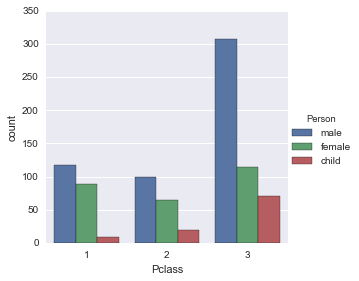

In [14]:
#see how the children stack up wth our classes, most kids were in 3rd class
sns.factorplot('Pclass', data=titanic_df, hue='Person', kind='count', order=[1,2,3])

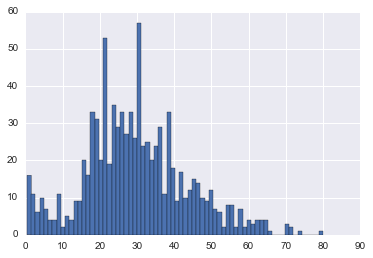

In [15]:
#see our age distribution
titanic_df['Age'].hist(bins=70)

In [16]:
#whats the average age?
titanic_df['Age'].mean()

29.726060606060603

In [17]:
#how many men women and children are there?
titanic_df['Person'].value_counts()

male      524
female    268
child      99
Name: Person, dtype: int64

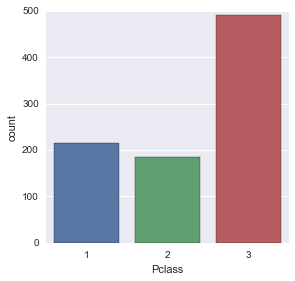

In [18]:
#what were the class distributions?
sns.factorplot('Pclass', data=titanic_df, kind='count', order=[1,2,3])

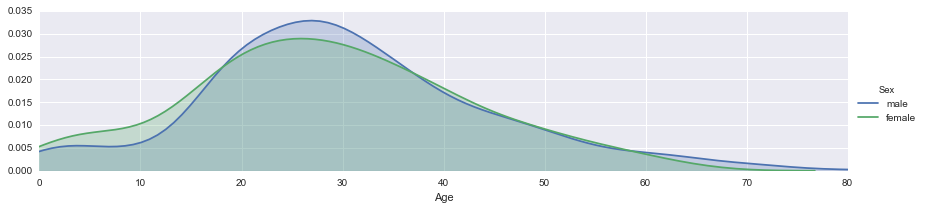

In [19]:
#Lets look at the age distribution by gender
#setup our figure
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
#set right limit to the oldest passenger, left to 0
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
#add a legend
fig.add_legend()

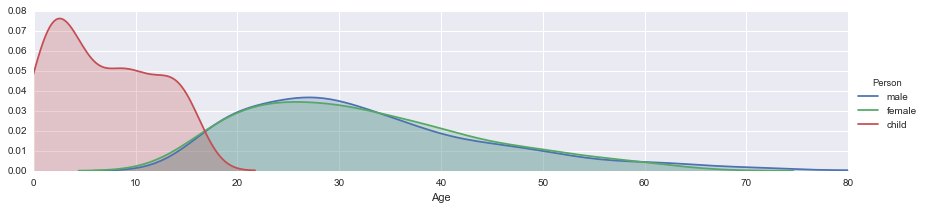

In [20]:
#Lets see the age distribution sorting children from adults
#setup our figure
fig = sns.FacetGrid(titanic_df, hue='Person',aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
#set right limit to the oldest passenger, left to 0
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
#add a legend
fig.add_legend()

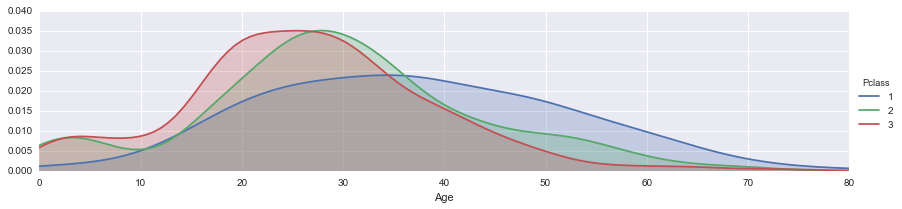

In [21]:
#Lets see age distribution by class. This graph is more telling then the previous two
#setup our figure, this time with classes
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4, hue_order=[1,2,3])
fig.map(sns.kdeplot, 'Age',shade=True)
#set right limit to the oldest passenger, left to 0
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
#add a legend
fig.add_legend()

In [22]:
#review our data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,male


In [23]:
#lots of missing cabin data to lets make a new object with the cabins we do have
deck = titanic_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

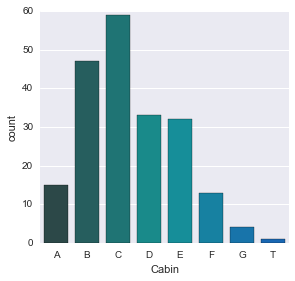

In [25]:
#we only really want the first letter
levels = []
for level in deck:
    levels.append(level[0])
#results weren't in order so went back and fixed that
levels.sort()
#turn this into a dataframe    
cabin_df = DataFrame(levels)
#label the column
cabin_df.columns = ['Cabin']
#see the factorplot of our cabin levels
sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count')

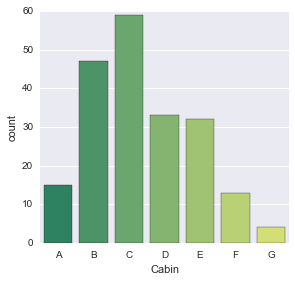

In [26]:
#removed the T deck
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df, palette='summer', kind='count')

In [27]:
#see our data again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,male


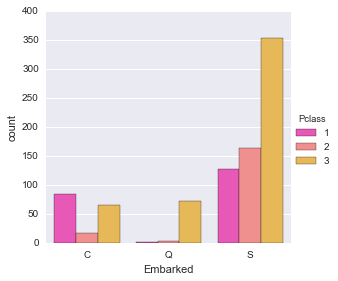

In [28]:
#make a factorplot of where people came from and seperated by class
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', order=['C','Q','S'], palette='spring', 
               hue_order=[1,2,3])

In [29]:
#who was alone or with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,male


In [30]:
#remember SibSp is siblings and Parch means they had parents or children on board
#make a new column for people who are alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [31]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [32]:
#for every location where the alone column is grater than 1, change it to 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
#for every location where the alone column is 0, change it to 'Alone'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\Adam\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
#now check it out
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,male,Alone


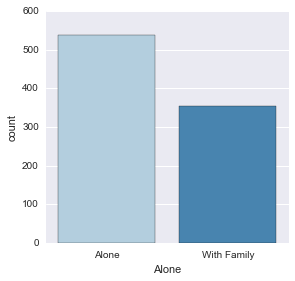

In [34]:
#see a comparison between alone and with family
sns.factorplot('Alone', data=titanic_df, kind='count', palette='Blues', order=['Alone','With Family'])

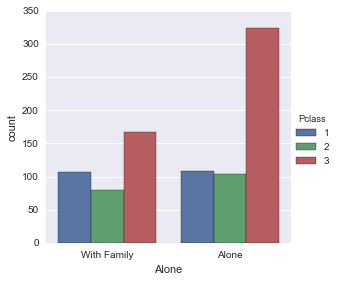

In [35]:
#see who was alone based on class, looks like mostly class 3 poeple were alone
sns.factorplot('Alone',data=titanic_df, kind='count',hue='Pclass', hue_order=[1,2,3])

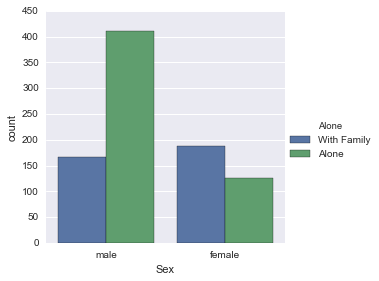

In [36]:
#we can also see that there were far more males alone
sns.factorplot('Sex',data=titanic_df, kind='count',hue='Alone')

In [37]:
#now lets analize the survivers
#make a new survivor column by mapping 0s and 1s to yes and no
titanic_df['Survivor']  = titanic_df.Survived.map({0:'no',1:'yes'})

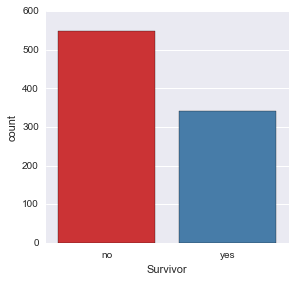

In [38]:
#most poeple didn't survive
sns.factorplot('Survivor',data=titanic_df, palette='Set1', kind='count')

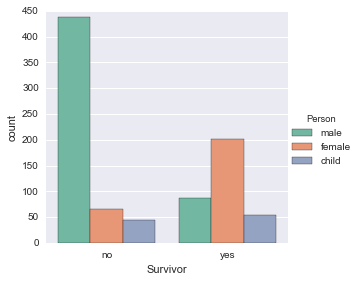

In [39]:
#The total number of deceased people were males
sns.factorplot("Survivor", data=titanic_df, palette='Set2',kind='count',hue='Person')

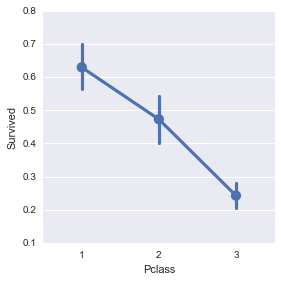

In [40]:
#which factors affected survival?
#looks like class did
sns.factorplot(x='Pclass',y='Survived',data=titanic_df, kind='point', order=[1,2,3])

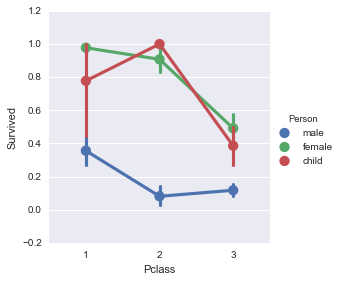

In [41]:
#but there were way more males in class 3...
sns.factorplot(x='Pclass',y='Survived',data=titanic_df, kind='point', order=[1,2,3], hue='Person')

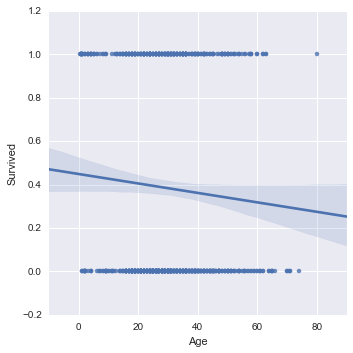

In [42]:
#what about age?
#linear regression shows older people didn't survive as much
sns.lmplot('Age','Survived',data=titanic_df)

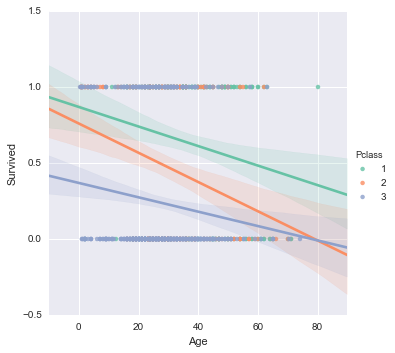

In [43]:
#lets see how class factors in
sns.lmplot('Age','Survived',data=titanic_df, hue='Pclass', hue_order=[1,2,3], palette='Set2')

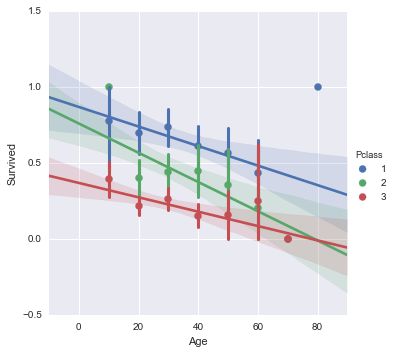

In [44]:
#make some custom bins for age
generations = [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',data=titanic_df, hue='Pclass', x_bins=generations, hue_order=[1,2,3])

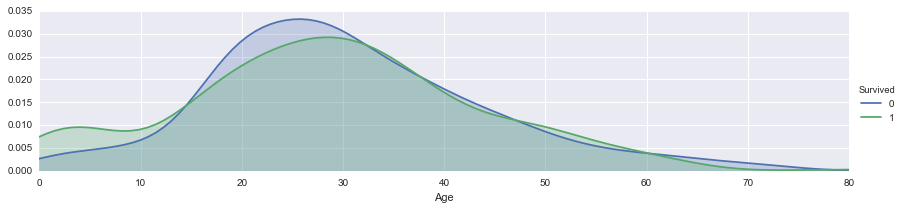

In [45]:
#another view of survivros by age
fig = sns.FacetGrid(titanic_df, hue='Survived',aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
#set right limit to the oldest passenger, left to 0
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
#add a legend
fig.add_legend()

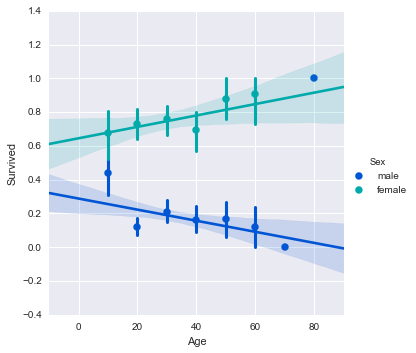

In [46]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations, palette='winter')

In [47]:
#did the deck have an affect of survival rate?
#did having family affect survival rate?

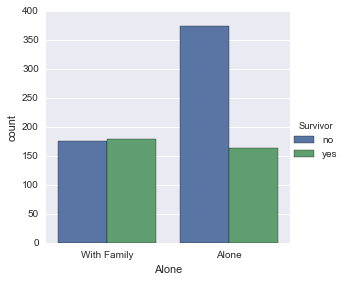

In [48]:
#people who were alone were not as likely to survive
sns.factorplot('Alone',data=titanic_df, hue='Survivor', kind='count')

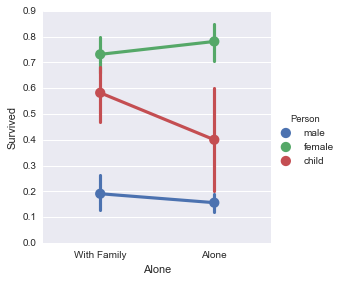

In [49]:
#we can see children and females are slightly more likely to survive when alone
sns.factorplot('Alone','Survived',data=titanic_df, hue='Person', kind='point')

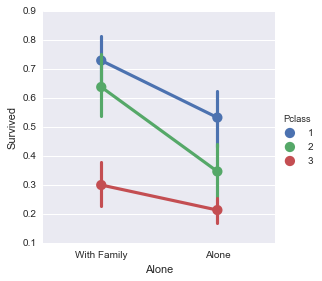

In [50]:
#being alone meant less likely to survive regardless of class 
#affected 2nd class the most
sns.factorplot('Alone','Survived',data=titanic_df, hue='Pclass',kind='point', hue_order=[1,2,3])

In [51]:
#cabin stuff again
titanic_cabins_df = titanic_df.dropna(subset=['Cabin'], how='all')
titanic_cabins_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,female,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,female,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,E46,S,male,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,16.7000,G6,S,child,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,26.5500,C103,S,female,Alone,yes


In [52]:
#add a column for which deck they are on
titanic_cabins_df['Deck'] = titanic_cabins_df['Cabin'].str[0:1]

C:\Users\Adam\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
#make sure everything is in order
titanic_cabins_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,26.5500,C103,S,female,Alone,yes,C


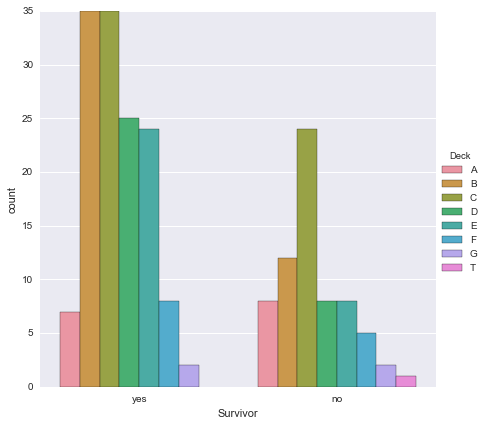

In [54]:
#see how many known survivors we have from each deck
sns.factorplot('Survivor',hue='Deck', data=titanic_cabins_df, kind='count', hue_order=['A','B','C','D','E','F','G','T'],
               size=6)

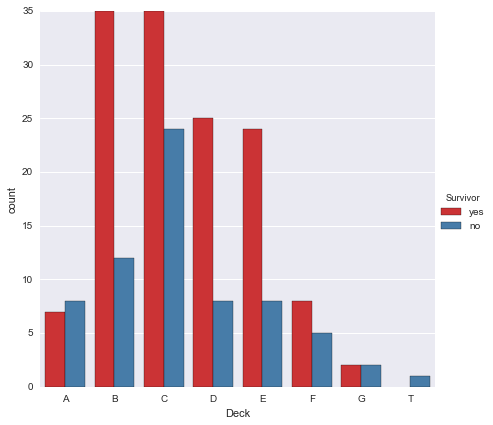

In [55]:
#survuvor comparison by deck
sns.factorplot('Deck',hue='Survivor', data=titanic_cabins_df, kind='count',size=6, palette='Set1',
              order=['A','B','C','D','E','F','G','T'])

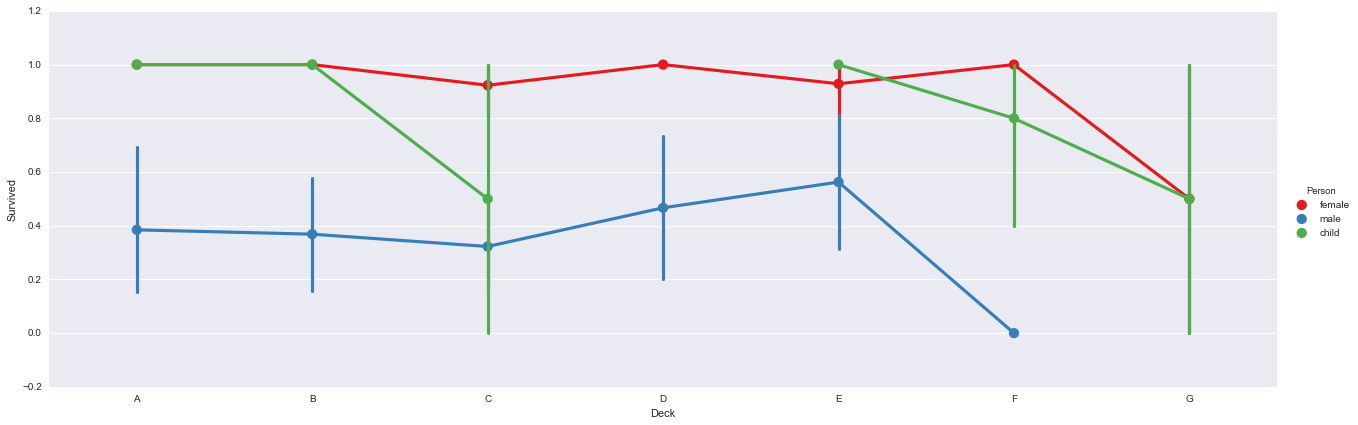

In [56]:
#survival rates by deck seperated by man,woman, and child
sns.factorplot('Deck','Survived',hue='Person', data=titanic_cabins_df, kind='point',size=6, palette='Set1',
              order=['A','B','C','D','E','F','G'], aspect=3)

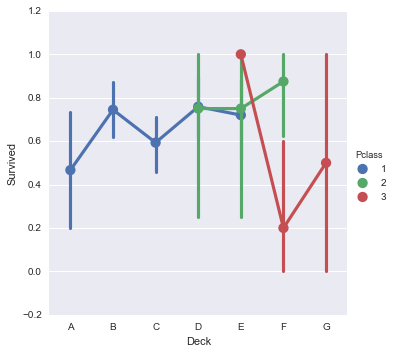

In [57]:
#here we can ruffly see a comparison between which class was on which deck and how likely they were to survive
sns.factorplot(x='Deck', y='Survived', data=titanic_cabins_df, kind='point', order=['A','B','C','D','E','F','G'],
               hue='Pclass', hue_order=[1,2,3], size=5)